In [1]:
#pip install textract
#pip install docx
#pip install python-docx 
#pip install antiword
#pip install pdftotext
#pip install PyPDF2

In [2]:

import nltk
import pandas as pd
import PyPDF2
import matplotlib.pyplot as plt
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import numpy as np
import csv
import warnings
import os
import docx2txt
import textract
import antiword
from docx import Document
import win32com.client as win32
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder


warnings.filterwarnings('ignore')



In [3]:
os.listdir(r'Resumes-20211103T133301Z-001.zip (Unzipped Files)\Resumes')


['Internship_Ravali_Musquare Technologies (1).docx',
 'Internship_Susovan Bag_Musquare Technologies.docx',
 'Peoplesoft resumes',
 'React Developer_Deepakreddy.docx',
 'React Developer_Haripriya.docx',
 'React Developer_Kamalakar Reddy.docx',
 'React Developer_Naveen sadhu.docx',
 'React Developer_PavasGoswami.doc',
 'React Developer_PavasGoswami.docx',
 'React Developer_Pragnya.docx',
 'React Developer_Sarala Madasu-converted.docx',
 'React Developer_Thirupathiamma.docx',
 'React Developer_Vinay Reddy.doc',
 'React Developer_Vinay Reddy.docx',
 'React Dev_Krishna Kanth.docx',
 'React Dev_Krishna Kanth_Musquare Technologies.docx',
 'React JS Developer_AnjaniPriyadarshini.doc',
 'React JS Developer_AnjaniPriyadarshini.docx',
 'React JS Developer_KotaniDurgaprasad[3_1] (1)-converted.docx',
 'React JS Developer_Venkatalakshmi (1)-converted.docx',
 'Reactjs Developer_kambala sai surendra_Musquare Technologies.docx',
 'Reactjs Developer_M Lokesh Babu_Musquare Technologies.docx',
 'Reactjs D

In [4]:
def convert_doc_to_docx(doc_file):
    # Initialize Word application
    word = win32.Dispatch('Word.Application')

    # Set visibility to False so that the Word application is not shown
    word.Visible = False

    # Open the .doc file
    doc = word.Documents.Open(doc_file)

    # Get the file path and name without the extension
    file_path, file_name = os.path.split(doc_file)
    file_name_without_ext = os.path.splitext(file_name)[0]

    # Create the .docx file path
    docx_file = os.path.join(file_path, f"{file_name_without_ext}.docx")

    # Save the .doc file as .docx format
    doc.SaveAs2(docx_file, FileFormat=16)  # FileFormat=16 specifies .docx format

    # Close the .doc file
    doc.Close()

    # Quit Word application
    word.Quit()

    print(f"File converted: {docx_file}")


In [6]:
directory = r'C:\Users\ROHIT\Desktop\PROJECT 2 (FINAL)\Resumes'
file_path = []
category = []

for filename in os.listdir(directory):
    if filename.endswith('.docx'):
        path = os.path.join(directory, filename)
        text = textract.process(path).decode('utf-8')
        file_path.append(text)
        category.append('React JS Developer Resume')

    elif filename.endswith('.pdf'):
        path = os.path.join(directory, filename)
        pdf_file = open(path, 'rb')
        pdf_reader = PyPDF2.PdfReader(pdf_file)
        text = ""
        for page_num in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
            text += page.extract_text()
        file_path.append(text)
        category.append('React JS Developer Resume')

        pdf_file.close()
        
    elif filename.endswith('.doc'):
        path = os.path.join(directory, filename)
        convert_doc_to_docx(path)
        docx_path = os.path.join(directory, f"{os.path.splitext(filename)[0]}.docx")
        text = textract.process(docx_path).decode('utf-8')
        file_path.append(text)
        category.append('React JS Developer Resume')


File converted: C:\Users\ROHIT\Desktop\PROJECT 2 (FINAL)\Resumes\React Developer_PavasGoswami.docx
File converted: C:\Users\ROHIT\Desktop\PROJECT 2 (FINAL)\Resumes\React Developer_Vinay Reddy.docx
File converted: C:\Users\ROHIT\Desktop\PROJECT 2 (FINAL)\Resumes\React JS Developer_AnjaniPriyadarshini.docx


In [7]:
directory = r'C:\Users\ROHIT\Desktop\PROJECT 2 (FINAL)\Resumes\Peoplesoft resumes'
file_path1 = []
category1 = []

for filename in os.listdir(directory):
    if filename.endswith('.docx'):
        path = os.path.join(directory, filename)
        text = textract.process(path).decode('utf-8')
        file_path1.append(text)
        category1.append('PeopleSoft Resume')

    elif filename.endswith('.pdf'):
        path = os.path.join(directory, filename)
        pdf_file = open(path, 'rb')
        pdf_reader = PyPDF2.PdfReader(pdf_file)
        text = ""
        for page_num in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
            text += page.extract_text()
        file_path1.append(text)
        category1.append('PeopleSoft Resume')

        pdf_file.close()
        
    elif filename.endswith('.doc'):
        path = os.path.join(directory, filename)
        convert_doc_to_docx(path)
        docx_path = os.path.join(directory, f"{os.path.splitext(filename)[0]}.docx")
        text = textract.process(docx_path).decode('utf-8')
        file_path.append(text)
        category.append('PeopleSoft Resume')


File converted: C:\Users\ROHIT\Desktop\PROJECT 2 (FINAL)\Resumes\Peoplesoft resumes\Peoplesoft Admin_G Ananda Rayudu.docx
File converted: C:\Users\ROHIT\Desktop\PROJECT 2 (FINAL)\Resumes\Peoplesoft resumes\Peoplesoft Admin_Gangareddy.docx
File converted: C:\Users\ROHIT\Desktop\PROJECT 2 (FINAL)\Resumes\Peoplesoft resumes\Peoplesoft Admin_Priyanka Ramadoss.docx
File converted: C:\Users\ROHIT\Desktop\PROJECT 2 (FINAL)\Resumes\Peoplesoft resumes\Peoplesoft Admin_srinivasarao.docx
File converted: C:\Users\ROHIT\Desktop\PROJECT 2 (FINAL)\Resumes\Peoplesoft resumes\Peoplesoft Admin_Vinod Akkala.docx
File converted: C:\Users\ROHIT\Desktop\PROJECT 2 (FINAL)\Resumes\Peoplesoft resumes\PeopleSoft DBA_Ganesh Alladi.docx
File converted: C:\Users\ROHIT\Desktop\PROJECT 2 (FINAL)\Resumes\Peoplesoft resumes\Peoplesoft Finance_Arun Venu.docx
File converted: C:\Users\ROHIT\Desktop\PROJECT 2 (FINAL)\Resumes\Peoplesoft resumes\Peoplesoft Finance_Pritam Biswas.docx
File converted: C:\Users\ROHIT\Desktop\PR

In [8]:
file_path2 = []
category2 = []
directory = r'C:\Users\ROHIT\Desktop\PROJECT 2 (FINAL)\Resumes\workday resumes'

for filename in os.listdir(directory):
    if filename.endswith('.docx'):
        path = os.path.join(directory, filename)
        text = textract.process(path).decode('utf-8')
        file_path2.append(text)
        category2.append('Workday Resume')

    elif filename.endswith('.pdf'):
        path = os.path.join(directory, filename)
        pdf_file = open(path, 'rb')
        pdf_reader = PyPDF2.PdfReader(pdf_file)
        text = ""
        for page_num in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
            text += page.extract_text()
        file_path2.append(text)
        category2.append('Workday Resume')

        pdf_file.close()
        
    elif filename.endswith('.doc'):
        path = os.path.join(directory, filename)
        convert_doc_to_docx(path)
        docx_path = os.path.join(directory, f"{os.path.splitext(filename)[0]}.docx")
        text = textract.process(docx_path).decode('utf-8')
        file_path.append(text)
        category.append('Workday Resume')


File converted: C:\Users\ROHIT\Desktop\PROJECT 2 (FINAL)\Resumes\workday resumes\Hari Krishna M_Hexaware.docx
File converted: C:\Users\ROHIT\Desktop\PROJECT 2 (FINAL)\Resumes\workday resumes\Harikrishna Akula_Hexaware.docx
File converted: C:\Users\ROHIT\Desktop\PROJECT 2 (FINAL)\Resumes\workday resumes\Hima Mendu_Hexaware.docx
File converted: C:\Users\ROHIT\Desktop\PROJECT 2 (FINAL)\Resumes\workday resumes\J. Sumanth Royal_Hexaware.docx
File converted: C:\Users\ROHIT\Desktop\PROJECT 2 (FINAL)\Resumes\workday resumes\Madeeswar A_Hexaware.docx
File converted: C:\Users\ROHIT\Desktop\PROJECT 2 (FINAL)\Resumes\workday resumes\Naresh Babu Cherukuri_Hexaware.docx
File converted: C:\Users\ROHIT\Desktop\PROJECT 2 (FINAL)\Resumes\workday resumes\Punugoti Swetha_Hexaware.docx
File converted: C:\Users\ROHIT\Desktop\PROJECT 2 (FINAL)\Resumes\workday resumes\ShireeshKumar_Hexaware.docx
File converted: C:\Users\ROHIT\Desktop\PROJECT 2 (FINAL)\Resumes\workday resumes\Sri Krishna S_Hexaware.docx
File c

In [9]:
file_path3 = []
category3 = []
directory = r'C:\Users\ROHIT\Desktop\PROJECT 2 (FINAL)\Resumes\SQL Developer Lightning insight'

for filename in os.listdir(directory):
    if filename.endswith('.docx'):
        path = os.path.join(directory, filename)
        text = textract.process(path).decode('utf-8')
        file_path3.append(text)
        category3.append('SQL Developer Lightning Insight Resume')

    elif filename.endswith('.pdf'):
        path = os.path.join(directory, filename)
        pdf_file = open(path, 'rb')
        pdf_reader = PyPDF2.PdfReader(pdf_file)
        text = ""
        for page_num in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
            text += page.extract_text()
        file_path3.append(text)
        category3.append('SQL Developer Lightning Insight Resume')

        pdf_file.close()
        
    elif filename.endswith('.doc'):
        path = os.path.join(directory, filename)
        convert_doc_to_docx(path)
        docx_path = os.path.join(directory, f"{os.path.splitext(filename)[0]}.docx")
        text = textract.process(docx_path).decode('utf-8')
        file_path.append(text)
        category.append('SQL Developer Lightning Insight Resume')


File converted: C:\Users\ROHIT\Desktop\PROJECT 2 (FINAL)\Resumes\SQL Developer Lightning insight\Nazeer Basha.docx
File converted: C:\Users\ROHIT\Desktop\PROJECT 2 (FINAL)\Resumes\SQL Developer Lightning insight\Priyanka L.docx
File converted: C:\Users\ROHIT\Desktop\PROJECT 2 (FINAL)\Resumes\SQL Developer Lightning insight\Tatikonda Kiran Kumar.docx


In [10]:
data_1 = pd.DataFrame(data = file_path , columns = ['Resumes'])
data_1['category'] = category
data_1


Resumes  \
0   Name: Ravali P \n\n\n\n                       ...   
1   SUSOVAN  BAG   \n\nSeeking  a  challenging  po...   
2   Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...   
3   HARIPRIYA BATTINA \n\nExperience as UI Develop...   
4   KAMALAKAR REDDY. A \n\nLinked In: https://www....   
5   Naveen Sadhu\n\n\n\n\n\nTitle: software develo...   
6   FULLSTACK SOFTWARE DEVELOPER / WEB DEVELOPER\n...   
7   FULLSTACK SOFTWARE DEVELOPER / WEB DEVELOPER\n...   
8   PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...   
9   SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...   
10  Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...   
11  Maryala Vinay Reddy\n\n\n\n\tProfessional Summ...   
12  Maryala Vinay Reddy\n\n\n\n\tProfessional Summ...   
13  Ui-Developer/ React JS Developer \n\nNAME: KRI...   
14  Ui-Developer/ React JS Developer \n\nNAME: KRI...   
15  CURRICULUM VITAE\n\n\n\n\n\n\n\nAnjani Priyada...   
16  CURRICULUM VITAE\n\n\n\n\n\n\n\nAnjani Priyada...   
17  Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...   
18  Venkatalakshmi Pedireddy\n\nSoftware Developer...   
19  KAMBALA SAI SURENDRA   \n\n \n\n \n\n \n\n\n\n...   
20  MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...   
21  MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...   
22  MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n   ...   
23     \nPage | 1  \n Name: M. Prabakaran  \nTitle...   
24  Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...   
25  Ranga Gaganam  \n\n\n\n \n\nProfessional\n\n \...   
26  SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...   
27  G. Ananda Rayudu \n\n\t\t       https://www.li...   
28  PeopleSoft Database Administrator\n\n         ...   
29  Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...   
30  PEOPLESOFT Administrator\n\n\n\n\n\nSRINIVAS.K...   
31  Vinod Akkala                                  ...   
32  PeopleSoft Admin/PeopleSoft DBA\n\n\n\nGanesh ...   
33  Arun Venu\n\n\n\n\t  EXPERIENCE SUMMARY\t\n\n\...   
34  Personal Details\t\t\n\n\n\nName\n\nPritam Bis...   
35  Rahul Ahuja\n\n-------------------------------...   
36  R Ahmed                                       ...   
37  Hari Krishna M\n\n\n\n\n\nSummary:\n\nA result...   
38  Harikrishna Akula                             ...   
39  HIMA.MENDU\n\n\t  \n\n\n\nCareer Objective\n\n...   
40  Name:\tJ. Sumanth Royal.\n\n\t\n\nPROFESSIONAL...   
41  Madeeswar A\n\n\t\n\n\t\t\n\n\t\t\tPROFILE SUM...   
42  Name\t: Naresh Babu Cherukuri\n\n\n\nObjective...   
43  Punugoti Swetha\n\nWorkday Technical Consultan...   
44  Shireesh Balasani                             ...   
45  Workday Integration Consultant\n\n\n\nName    ...   
46  Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...   
47   Hyderabad\n\n\nNazeer Basha\n\nSQL and Power...   
48  SQL SERVER DEVELOPER\n\n\n\n\n\nPriyanka L    ...   
49  Tatikonda Kiran Kumar.\n\n\n\n\n\n\n\n\t\tCare...   

                                  category  
0                React JS Developer Resume  
1                React JS Developer Resume  
2                React JS Developer Resume  
3                React JS Developer Resume  
4                React JS Developer Resume  
5                React JS Developer Resume  
6                React JS Developer Resume  
7                React JS Developer Resume  
8                React JS Developer Resume  
9                React JS Developer Resume  
10               React JS Developer Resume  
11               React JS Developer Resume  
12               React JS Developer Resume  
13               React JS Developer Resume  
14               React JS Developer Resume  
15               React JS Developer Resume  
16               React JS Developer Resume  
17               React JS Developer Resume  
18               React JS Developer Resume  
19               React JS Developer Resume  
20               React JS Developer Resume  
21               React JS Developer Resume  
22               React JS Developer Resume  
23               React JS Developer Resume  
24           

In [11]:
data_2 = pd.DataFrame(data = file_path1 , columns = ['Resumes'])
data_2['category_1'] = category1
data_2


Resumes         category_1
0   Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...  PeopleSoft Resume
1   G. Ananda Rayudu \n\n\t\t       https://www.li...  PeopleSoft Resume
2   PeopleSoft Database Administrator\n\n         ...  PeopleSoft Resume
3   Classification: Internal\n\nClassification: In...  PeopleSoft Resume
4   Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...  PeopleSoft Resume
5   SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...  PeopleSoft Resume
6   PEOPLESOFT Administrator\n\n\n\n\n\nSRINIVAS.K...  PeopleSoft Resume
7   PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...  PeopleSoft Resume
8   Vinod Akkala                                  ...  PeopleSoft Resume
9   PeopleSoft Admin/PeopleSoft DBA\n\n\n\nGanesh ...  PeopleSoft Resume
10  PeopleSoft Administration\n\n \n\nVivekanand S...  PeopleSoft Resume
11  Arun Venu\n\n\n\n\t  EXPERIENCE SUMMARY\t\n\n\...  PeopleSoft Resume
12  Personal Details\t\t\n\n\n\nName\n\nPritam Bis...  PeopleSoft Resume
13  Rahul Ahuja\n\n-------------------------------...  PeopleSoft Resume
14  Hari Narayana \t\t              \n\n\t\n\n\n\n...  PeopleSoft Resume
15  Murali\t\t       \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...  PeopleSoft Resume
16  Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...  PeopleSoft Resume
17  R Ahmed                                       ...  PeopleSoft Resume
18  Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...  PeopleSoft Resume
19  C O N T A C T :\n\n\n\nAddress: Manyata Tech P...  PeopleSoft Resume

In [12]:
data_3 = pd.DataFrame(data = file_path2 , columns = ['Resumes'])
data_3['category_2'] = category2
data_3


Resumes      category_2
0   Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...  Workday Resume
1   Name         : Gopi Krishna Reddy\n\n\t\t\t\t ...  Workday Resume
2   Hari Krishna M\n\n\n\n\n\nSummary:\n\nA result...  Workday Resume
3   Harikrishna Akula                             ...  Workday Resume
4   HIMA.MENDU\n\n\t  \n\n\n\nCareer Objective\n\n...  Workday Resume
5   G Himaja\n\n                                  ...  Workday Resume
6   Name:\tJ. Sumanth Royal.\n\n\t\n\nPROFESSIONAL...  Workday Resume
7   JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...  Workday Resume
8   Madeeswar A\n\n\t\n\n\t\t\n\n\t\t\tPROFILE SUM...  Workday Resume
9   Mooraboyina Guravaiah\n\nWorkday Integration S...  Workday Resume
10  Name\t: Naresh Babu Cherukuri\n\n\n\nObjective...  Workday Resume
11  VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...  Workday Resume
12  Punugoti Swetha\n\nWorkday Technical Consultan...  Workday Resume
13  Workday HCM  Techno functional Consultant     ...  Workday Resume
14  Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...  Workday Resume
15  Shireesh Balasani                             ...  Workday Resume
16  Workday Integration Consultant\n\n\n\nName    ...  Workday Resume
17  Srikanth (WORKDAY hCM Consultant)\t           ...  Workday Resume
18  WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...  Workday Resume
19  Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...  Workday Resume
20  Vinay kumar .v\nWorkday Functional Consultant\...  Workday Resume

In [13]:
data_4 = pd.DataFrame(data = file_path3 , columns = ['Resumes'])
data_4['category_3'] = category3
data_4


Resumes  \
0   ANIL KUMAR MADDUKURI  \t\t\n\nSQL & MSBI Devel...   
1   Aradhana Tripathi\n\n\n\nCurrent Location: Gac...   
2   BUDDHA VAMSI                                  ...   
3   KAMBALLA PRADEEP                              ...   
4    Hyderabad\n\n\nNazeer Basha\n\nSQL and Power...   
5   Resume\n\nName     :  Neeraj Mishra\n\n\n\nExp...   
6   SQL DEVELOPER\n\nName: -   Bandi prem sai\n\n\...   
7   SQL SERVER DEVELOPER\n\n\n\n\n\nPriyanka L    ...   
8   SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...   
9   RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...   
10  resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...   
11  Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...   
12  Tatikonda Kiran Kumar.\n\n\n\n\n\n\n\n\t\tCare...   
13  SQL AND MSBI DEVELOPER\n\nSQL AND MSBI DEVELOP...   

                                category_3  
0   SQL Developer Lightning Insight Resume  
1   SQL Developer Lightning Insight Resume  
2   SQL Developer Lightning Insight Resume  
3   SQL Developer Lightning Insight Resume  
4   SQL Developer Lightning Insight Resume  
5   SQL Developer Lightning Insight Resume  
6   SQL Developer Lightning Insight Resume  
7   SQL Developer Lightning Insight Resume  
8   SQL Developer Lightning Insight Resume  
9   SQL Developer Lightning Insight Resume  
10  SQL Developer Lightning Insight Resume  
11  SQL Developer Lightning Insight Resume  
12  SQL Developer Lightning Insight Resume  
13  SQL Developer Lightning Insight Resume

In [14]:
df = data_1.append([data_2, data_3, data_4], ignore_index = True)
df['Category'] = category + category1 + category2 + category3
df


Resumes  \
0    Name: Ravali P \n\n\n\n                       ...   
1    SUSOVAN  BAG   \n\nSeeking  a  challenging  po...   
2    Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...   
3    HARIPRIYA BATTINA \n\nExperience as UI Develop...   
4    KAMALAKAR REDDY. A \n\nLinked In: https://www....   
..                                                 ...   
100  RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...   
101  resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...   
102  Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...   
103  Tatikonda Kiran Kumar.\n\n\n\n\n\n\n\n\t\tCare...   
104  SQL AND MSBI DEVELOPER\n\nSQL AND MSBI DEVELOP...   

                      category category_1 category_2  \
0    React JS Developer Resume        NaN        NaN   
1    React JS Developer Resume        NaN        NaN   
2    React JS Developer Resume        NaN        NaN   
3    React JS Developer Resume        NaN        NaN   
4    React JS Developer Resume        NaN        NaN   
..                         ...        ...        ...   
100                        NaN        NaN        NaN   
101                        NaN        NaN        NaN   
102                        NaN        NaN        NaN   
103                        NaN        NaN        NaN   
104                        NaN        NaN        NaN   

                                 category_3  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   
..                                      ...   
100  SQL Developer Lightning Insight Resume   
101  SQL Developer Lightning Insight Resume   
102  SQL Developer Lightning Insight Resume   
103  SQL Developer Lightning Insight Resume   
104  SQL Developer Lightning Insight Resume   

                                   Category  
0                 React JS Developer Resume  
1                 React JS Developer Resume  
2                 React JS Developer Resume  
3                 React JS Developer Resume  
4                 React JS Developer Resume  
..                                      ...  
100  SQL Developer Lightning Insight Resume  
101  SQL Developer Lightning Insight Resume  
102  SQL Developer Lightning Insight Resume  
103  SQL Developer Lightning Insight Resume  
104  SQL Developer Lightning Insight Resume  

[105 rows x 6 columns]

In [15]:
df.drop(columns=['category','category_1','category_2','category_3'], inplace=True)


In [16]:
df

Resumes  \
0    Name: Ravali P \n\n\n\n                       ...   
1    SUSOVAN  BAG   \n\nSeeking  a  challenging  po...   
2    Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...   
3    HARIPRIYA BATTINA \n\nExperience as UI Develop...   
4    KAMALAKAR REDDY. A \n\nLinked In: https://www....   
..                                                 ...   
100  RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...   
101  resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...   
102  Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...   
103  Tatikonda Kiran Kumar.\n\n\n\n\n\n\n\n\t\tCare...   
104  SQL AND MSBI DEVELOPER\n\nSQL AND MSBI DEVELOP...   

                                   Category  
0                 React JS Developer Resume  
1                 React JS Developer Resume  
2                 React JS Developer Resume  
3                 React JS Developer Resume  
4                 React JS Developer Resume  
..                                      ...  
100  SQL Developer Lightning Insight Resume  
101  SQL Developer Lightning Insight Resume  
102  SQL Developer Lightning Insight Resume  
103  SQL Developer Lightning Insight Resume  
104  SQL Developer Lightning Insight Resume  

[105 rows x 2 columns]

In [17]:
df.to_csv('converted_resumes.csv', index=False)

In [18]:
df = pd.read_csv('converted_resumes.csv')

In [19]:
df.tail(10)

Resumes  \
95    Hyderabad\n\n\nNazeer Basha\n\nSQL and Power...   
96   Resume\n\nName     :  Neeraj Mishra\n\n\n\nExp...   
97   SQL DEVELOPER\n\nName: -   Bandi prem sai\n\n\...   
98   SQL SERVER DEVELOPER\n\n\n\n\n\nPriyanka L    ...   
99   SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...   
100  RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...   
101  resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...   
102  Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...   
103  Tatikonda Kiran Kumar.\n\n\n\n\n\n\n\n\t\tCare...   
104  SQL AND MSBI DEVELOPER\n\nSQL AND MSBI DEVELOP...   

                                   Category  
95   SQL Developer Lightning Insight Resume  
96   SQL Developer Lightning Insight Resume  
97   SQL Developer Lightning Insight Resume  
98   SQL Developer Lightning Insight Resume  
99   SQL Developer Lightning Insight Resume  
100  SQL Developer Lightning Insight Resume  
101  SQL Developer Lightning Insight Resume  
102  SQL Developer Lightning Insight Resume  
103  SQL Developer Lightning Insight Resume  
104  SQL Developer Lightning Insight Resume

In [20]:
df.describe()

Resumes        Category
count                                                 105             105
unique                                                 79               4
top     Name\t: Naresh Babu Cherukuri\n\n\n\nObjective...  Workday Resume
freq                                                    2              31

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Resumes   105 non-null    object
 1   Category  105 non-null    object
dtypes: object(2)
memory usage: 1.8+ KB


In [22]:
df[df.duplicated("Resumes")]

Resumes  \
7    FULLSTACK SOFTWARE DEVELOPER / WEB DEVELOPER\n...   
12   Maryala Vinay Reddy\n\n\n\n\tProfessional Summ...   
16   CURRICULUM VITAE\n\n\n\n\n\n\n\nAnjani Priyada...   
51   G. Ananda Rayudu \n\n\t\t       https://www.li...   
52   PeopleSoft Database Administrator\n\n         ...   
54   Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...   
56   PEOPLESOFT Administrator\n\n\n\n\n\nSRINIVAS.K...   
58   Vinod Akkala                                  ...   
59   PeopleSoft Admin/PeopleSoft DBA\n\n\n\nGanesh ...   
61   Arun Venu\n\n\n\n\t  EXPERIENCE SUMMARY\t\n\n\...   
62   Personal Details\t\t\n\n\n\nName\n\nPritam Bis...   
63   Rahul Ahuja\n\n-------------------------------...   
67   R Ahmed                                       ...   
72   Hari Krishna M\n\n\n\n\n\nSummary:\n\nA result...   
73   Harikrishna Akula                             ...   
74   HIMA.MENDU\n\n\t  \n\n\n\nCareer Objective\n\n...   
76   Name:\tJ. Sumanth Royal.\n\n\t\n\nPROFESSIONAL...   
78   Madeeswar A\n\n\t\n\n\t\t\n\n\t\t\tPROFILE SUM...   
80   Name\t: Naresh Babu Cherukuri\n\n\n\nObjective...   
82   Punugoti Swetha\n\nWorkday Technical Consultan...   
85   Shireesh Balasani                             ...   
86   Workday Integration Consultant\n\n\n\nName    ...   
89   Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...   
95    Hyderabad\n\n\nNazeer Basha\n\nSQL and Power...   
98   SQL SERVER DEVELOPER\n\n\n\n\n\nPriyanka L    ...   
103  Tatikonda Kiran Kumar.\n\n\n\n\n\n\n\n\t\tCare...   

                                   Category  
7                 React JS Developer Resume  
12                React JS Developer Resume  
16                React JS Developer Resume  
51                        PeopleSoft Resume  
52                        PeopleSoft Resume  
54                        PeopleSoft Resume  
56                        PeopleSoft Resume  
58                        PeopleSoft Resume  
59                        PeopleSoft Resume  
61                        PeopleSoft Resume  
62                        PeopleSoft Resume  
63                        PeopleSoft Resume  
67                        PeopleSoft Resume  
72                           Workday Resume  
73                           Workday Resume  
74                           Workday Resume  
76                           Workday Resume  
78                           Workday Resume  
80                           Workday Resume  
82                           Workday Resume  
85                           Workday Resume  
86                           Workday Resume  
89                           Workday Resume  
95   SQL Developer Lightning Insight Resume  
98   SQL Developer Lightning Insight Resume  
103  SQL Developer Lightning Insight Resume

In [23]:
def clean_text(text):
    

    # Remove links
    text = re.sub(r'http\S+', ' ', text)
    
    # Remove punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    
    # Remove non-english alphabets
    text = ''.join([i for i in text if i.isalpha() or i.isspace()])
    
    # Remove numbers
    text = re.sub(r'\d+', ' ', text)
    
    text = text.lower()

    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Remove stopwords and lemmatize the remaining words
    lemma= WordNetLemmatizer()
    stop_words = nltk.corpus.stopwords.words("english")


    nouns = [token for token in tokens if nltk.pos_tag([token])[0][1] == "NOUN"]
    tokens = [lemma.lemmatize(i) for i in tokens if not i in stop_words and i not in nouns]
    
    # Join the tokens back into a string
    text = ' '.join(tokens)

    return text


In [24]:
# applying function on resumes

df['Resumes']= df['Resumes'].apply(clean_text)
df

Resumes  \
0    name ravali p curriculum vitae specialization ...   
1    susovan bag seeking challenging position field...   
2    kanumuru deepak reddy career objective secure ...   
3    haripriya battina experience ui developer reac...   
4    kamalakar reddy linked professional summary ye...   
..                                                 ...   
100  raju pavana kumari professional summary year p...   
101  resume ramalakshmi k career objective professi...   
102  name ramesh career objective contribute organi...   
103  tatikonda kiran kumar career objective rewardi...   
104  sql msbi developer sql msbi developer b vinod ...   

                                   Category  
0                 React JS Developer Resume  
1                 React JS Developer Resume  
2                 React JS Developer Resume  
3                 React JS Developer Resume  
4                 React JS Developer Resume  
..                                      ...  
100  SQL Developer Lightning Insight Resume  
101  SQL Developer Lightning Insight Resume  
102  SQL Developer Lightning Insight Resume  
103  SQL Developer Lightning Insight Resume  
104  SQL Developer Lightning Insight Resume  

[105 rows x 2 columns]

In [25]:
df['Category'].value_counts()

Workday Resume                            31
PeopleSoft Resume                         30
React JS Developer Resume                 27
SQL Developer Lightning Insight Resume    17
Name: Category, dtype: int64

In [26]:
plt.rcParams['figure.figsize']= (12,6)
sns.set_style(style='darkgrid')


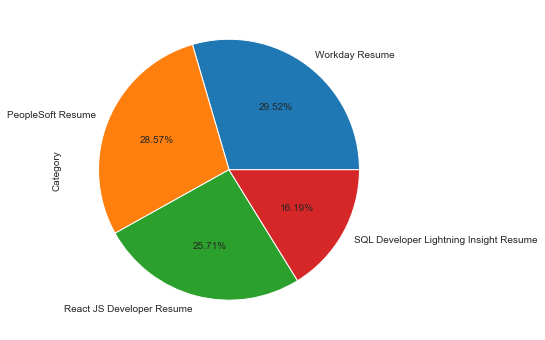

In [27]:
df['Category'].value_counts().plot(kind='pie', autopct='%0.2f%%') 
plt.show()

- Here the data is approximately balanced, so we may not face multicoliniarity issue.

In [28]:
workday = df[df['Category']=='Workday Resume']
reactjs = df[df['Category']=='React JS Developer Resume']
sqldeveloper = df[df['Category']=='SQL Developer Lightning Insight Resume']
peoplesoft = df[df['Category']=='PeopleSoft Resume']

In [29]:
df['Length']= df['Resumes'].apply(lambda x:len(nltk.word_tokenize(x)))

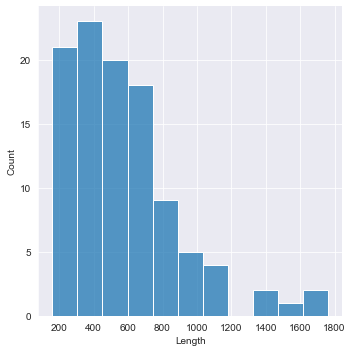

In [30]:
sns.displot(df['Length'])
plt.show()

- this way of analysis is not showing any proper result.
- Most of the resumes are consist of 200 and 400

In [31]:
from nltk.corpus import stopwords
import string

In [32]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = df['Resumes'].values
cleanedSentences = ""
for i in range(0,77):
    cleanedText = clean_text(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(200)
print(mostcommon)

[('application', 735), ('peoplesoft', 725), ('experience', 644), ('server', 638), ('project', 424), ('report', 421), ('database', 411), ('integration', 355), ('using', 350), ('workday', 338), ('process', 334), ('web', 315), ('data', 295), ('system', 281), ('tool', 275), ('environment', 274), ('worked', 247), ('client', 240), ('role', 237), ('team', 229), ('people', 226), ('c', 225), ('involved', 209), ('service', 208), ('knowledge', 206), ('oracle', 204), ('domain', 201), ('support', 199), ('business', 196), ('technology', 195), ('hcm', 187), ('development', 185), ('requirement', 181), ('testing', 180), ('responsibility', 180), ('like', 179), ('issue', 178), ('change', 177), ('skill', 174), ('design', 171), ('scheduler', 169), ('production', 168), ('technical', 165), ('user', 161), ('react', 161), ('developer', 159), ('working', 155), ('management', 152), ('good', 149), ('creating', 149), ('test', 148), ('j', 145), ('window', 143), ('created', 142), ('work', 140), ('fscm', 140), ('upda

In [33]:
words0= []

for word, count in mostcommon:
    words0.append(word)

In [34]:
WORDCLOUD_COLOR_MAP = 'tab10_r'

In [35]:
def wordcl(data, title):
    stop = STOPWORDS
    wc = WordCloud(height=2000, width= 4000, colormap=WORDCLOUD_COLOR_MAP, stopwords=stop).generate(data)
    plt.imshow(wc)
    plt.axis('off')
    plt.title(title)

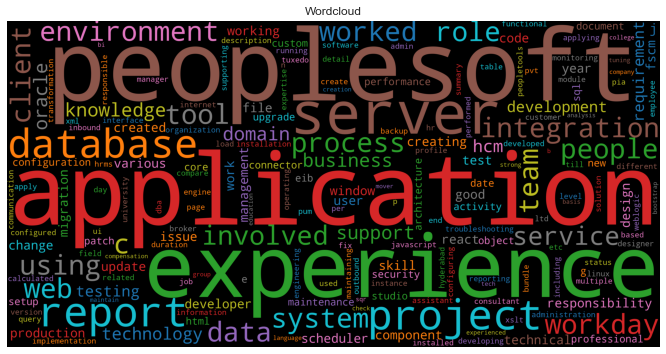

In [36]:
wordcl(" ".join(words0), "Wordcloud")

In [37]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = workday['Resumes'].values
cleanedSentences = ""
for i in range(len(workday)):
    cleanedText = clean_text(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('workday', 630), ('integration', 452), ('report', 415), ('business', 270), ('experience', 246), ('using', 216), ('eib', 208), ('process', 185), ('system', 184), ('core', 180), ('hcm', 170), ('worked', 170), ('connector', 170), ('studio', 163), ('requirement', 162), ('custom', 149), ('data', 143), ('field', 142), ('client', 138), ('created', 133), ('document', 130), ('security', 130), ('testing', 125), ('service', 125), ('project', 124), ('support', 123), ('consultant', 119), ('change', 117), ('inbound', 112), ('xslt', 112), ('calculated', 109), ('involved', 105), ('team', 104), ('xml', 103), ('like', 102), ('role', 101), ('knowledge', 98), ('design', 98), ('outbound', 95), ('creating', 92), ('technical', 90), ('developed', 90), ('issue', 89), ('working', 88), ('functional', 88), ('compensation', 88), ('test', 87), ('good', 86), ('transformation', 85), ('management', 84)]


In [38]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = reactjs['Resumes'].values
cleanedSentences = ""
for i in range(len(reactjs)):
    cleanedText = clean_text(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('react', 161), ('j', 137), ('project', 130), ('c', 122), ('experience', 120), ('html', 109), ('application', 100), ('using', 98), ('web', 95), ('developer', 94), ('technology', 88), ('javascript', 82), ('design', 81), ('ui', 73), ('e', 71), ('knowledge', 71), ('skill', 64), ('team', 64), ('work', 56), ('service', 52), ('good', 50), ('role', 50), ('n', 49), ('development', 49), ('bootstrap', 49), ('system', 47), ('working', 47), ('component', 46), ('used', 45), ('end', 44), ('responsibility', 44), ('year', 39), ('software', 37), ('engineering', 37), ('responsible', 36), ('website', 35), ('designing', 35), ('developing', 32), ('code', 32), ('client', 32), ('management', 31), ('involved', 31), ('technical', 30), ('communication', 30), ('professional', 30), ('front', 29), ('redux', 29), ('page', 29), ('detail', 29), ('jquery', 29)]


In [39]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = sqldeveloper['Resumes'].values
cleanedSentences = ""
for i in range(len(sqldeveloper)):
    cleanedText = clean_text(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('sql', 264), ('data', 161), ('experience', 128), ('server', 125), ('report', 110), ('using', 102), ('table', 89), ('database', 83), ('query', 83), ('function', 82), ('bi', 80), ('power', 71), ('knowledge', 71), ('project', 68), ('business', 58), ('good', 53), ('procedure', 53), ('system', 53), ('service', 52), ('requirement', 51), ('role', 48), ('user', 48), ('view', 48), ('stored', 45), ('developed', 43), ('client', 42), ('index', 42), ('join', 42), ('developer', 41), ('like', 41), ('date', 40), ('design', 40), ('development', 40), ('ssis', 39), ('creating', 38), ('tool', 38), ('trigger', 37), ('application', 35), ('sub', 33), ('technology', 32), ('technical', 31), ('skill', 30), ('task', 30), ('information', 30), ('professional', 28), ('package', 28), ('multiple', 27), ('working', 27), ('various', 27), ('team', 25)]


In [40]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = peoplesoft['Resumes'].values
cleanedSentences = ""
for i in range(len(peoplesoft)):
    cleanedText = clean_text(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('peoplesoft', 689), ('server', 613), ('application', 594), ('experience', 376), ('database', 365), ('process', 245), ('environment', 226), ('project', 223), ('tool', 214), ('people', 200), ('domain', 192), ('oracle', 185), ('web', 182), ('report', 177), ('scheduler', 164), ('data', 155), ('fscm', 140), ('production', 133), ('worked', 133), ('support', 129), ('system', 125), ('involved', 125), ('migration', 124), ('client', 122), ('role', 122), ('issue', 120), ('change', 117), ('using', 115), ('update', 114), ('window', 112), ('patch', 109), ('c', 102), ('hcm', 100), ('configuration', 99), ('team', 97), ('like', 96), ('file', 95), ('integration', 93), ('setup', 91), ('creating', 91), ('user', 90), ('development', 89), ('various', 89), ('responsibility', 87), ('pum', 85), ('upgrade', 85), ('troubleshooting', 84), ('instance', 83), ('configured', 83), ('tuxedo', 82)]


In [41]:
categories = np.sort(df['Category'].unique())
categories

array(['PeopleSoft Resume', 'React JS Developer Resume',
       'SQL Developer Lightning Insight Resume', 'Workday Resume'],
      dtype=object)

In [42]:
df_categories = [df[df['Category'] == category].loc[:, ['Resumes', 'Category']] for category in categories]



In [43]:
def wordcloud(df):
    txt = ' '.join(txt for txt in df['Resumes'])
    wordcloud = WordCloud(
        height=2000,
        width=4000,
        colormap=WORDCLOUD_COLOR_MAP
    ).generate(txt)

    return wordcloud

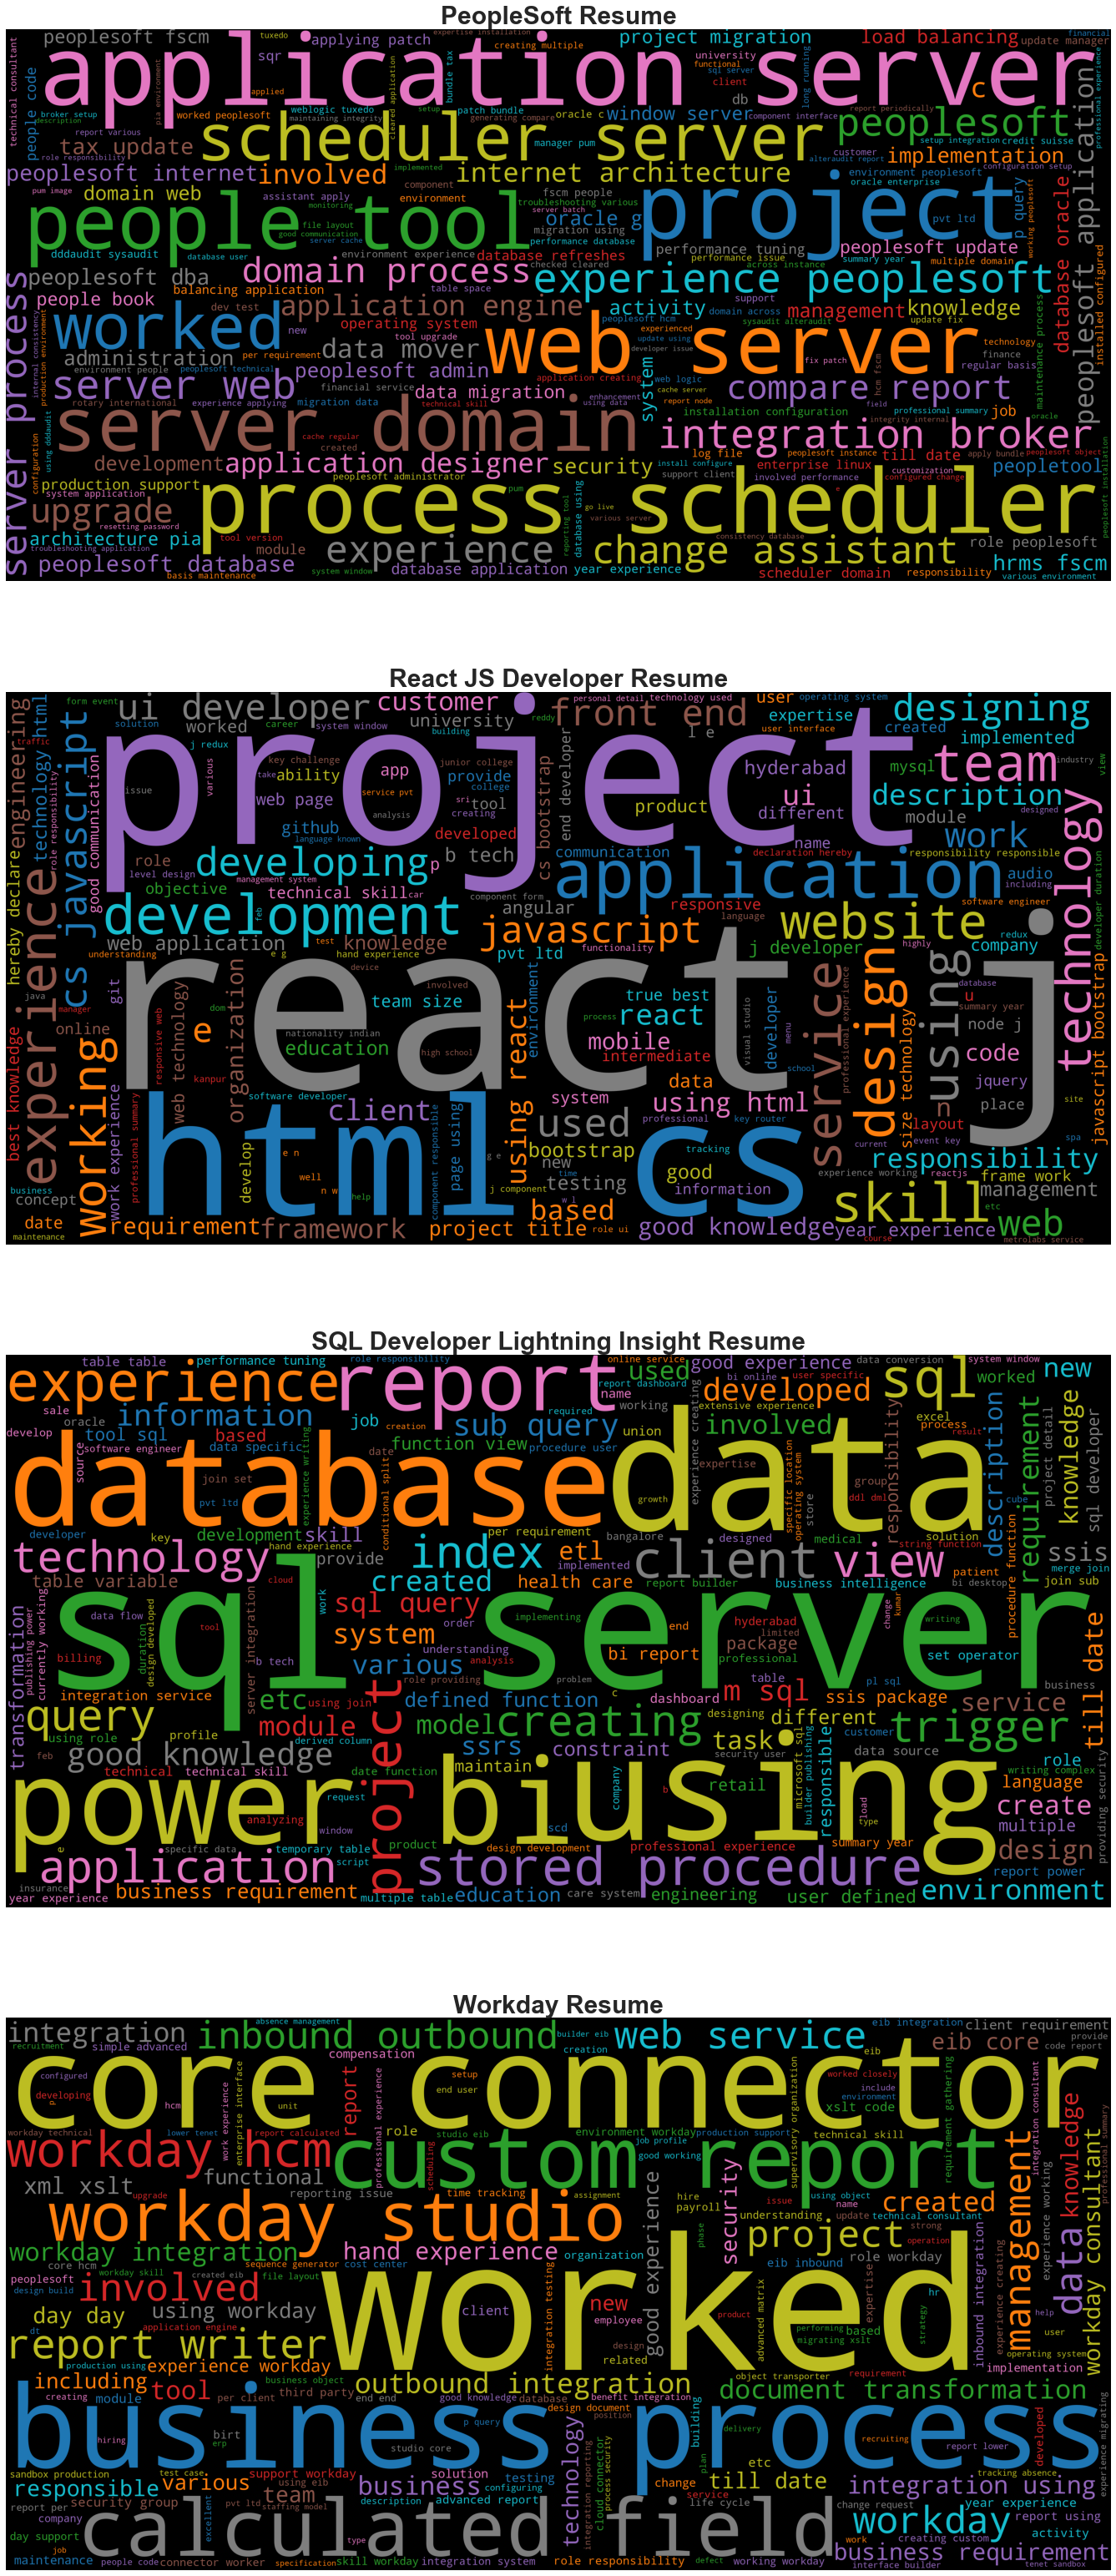

In [44]:
WORDCLOUD_COLOR_MAP = 'tab10_r'
plt.figure(figsize=(64, 56))

for i, category in enumerate(categories):
    wc = wordcloud(df_categories[i])

    plt.subplot(4, 1, i + 1).set_title(category,fontsize=30,fontweight= 'bold')
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

# Unique Words

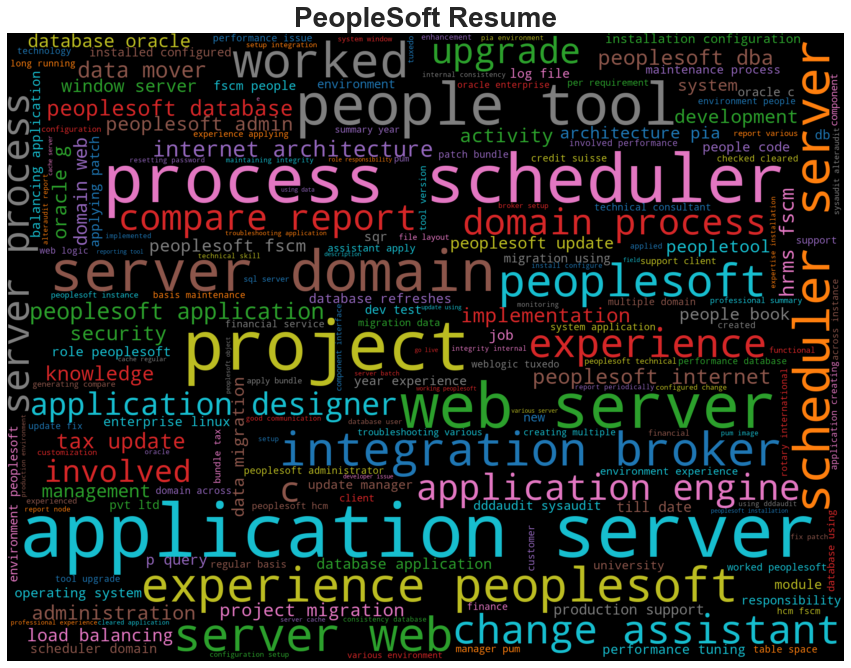

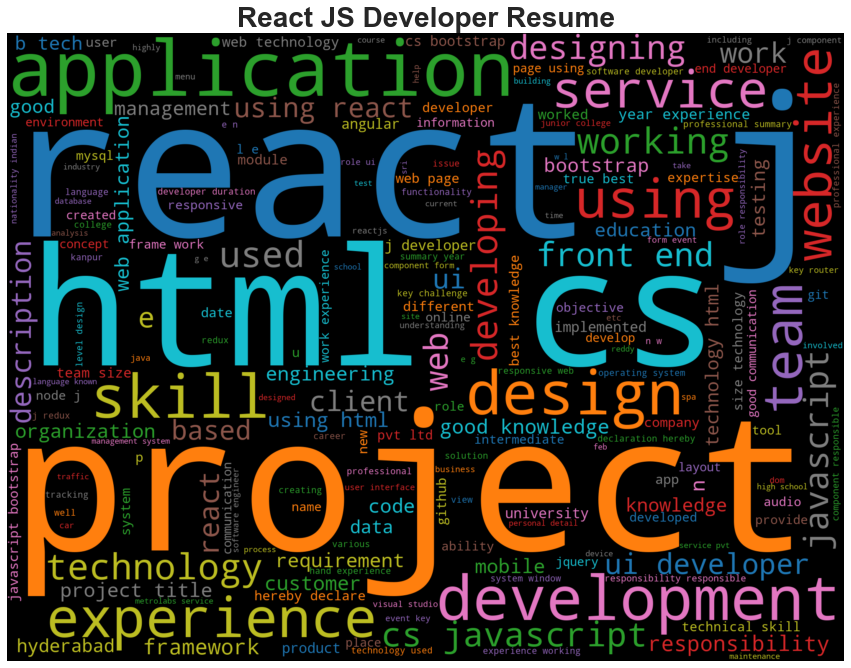

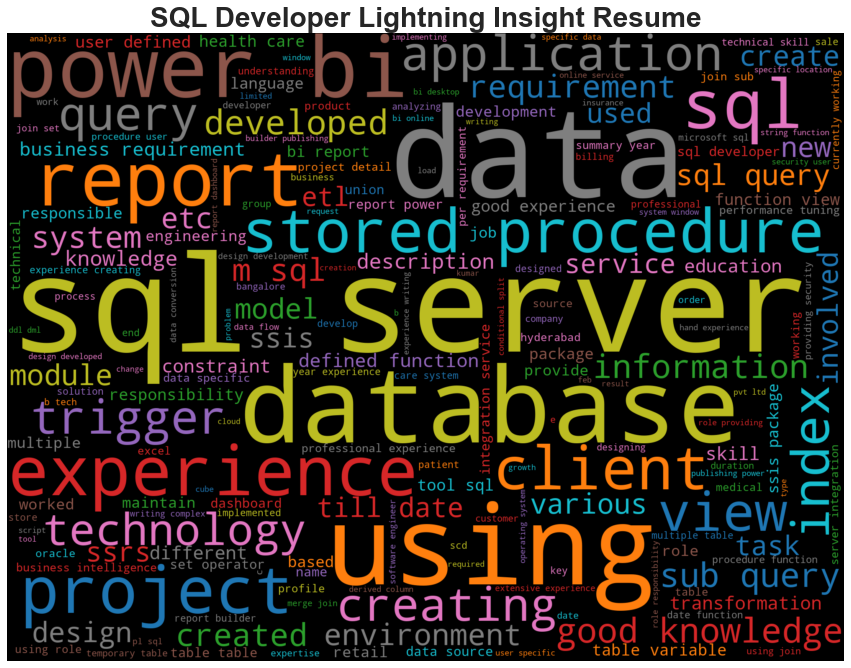

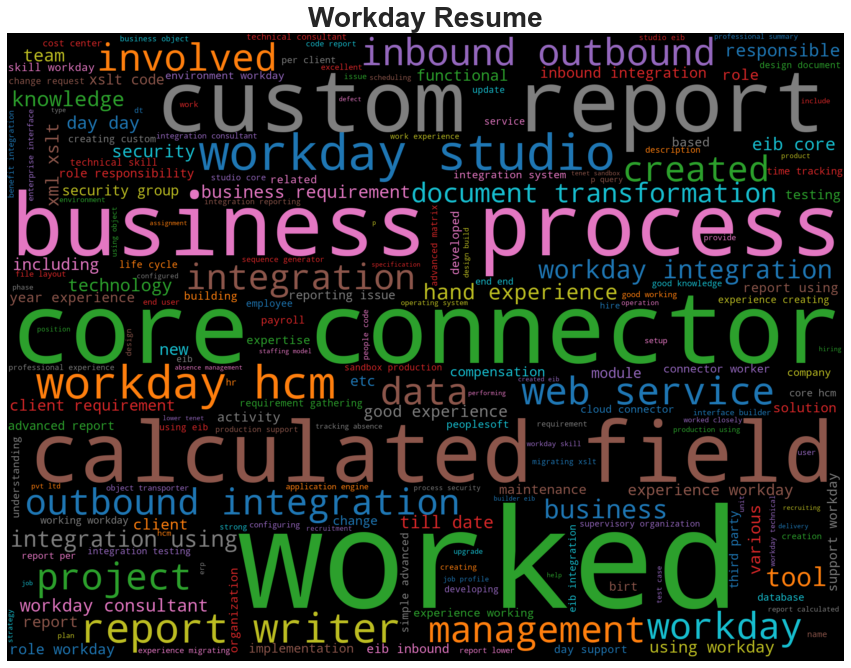

In [45]:
unique = df.groupby('Category')['Resumes'].apply(lambda x: ' '.join(x))

# Generate a word cloud for each group
for category, text in unique.items():
    wordcloud = WordCloud(height=1500,width=2000,colormap=WORDCLOUD_COLOR_MAP).generate(text)

    WORDCLOUD_COLOR_MAP = 'tab10_r'
    plt.figure(figsize=(15, 25))

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(category,fontsize=28,fontweight= 'bold')
    plt.show()


In [46]:
from textblob import TextBlob

In [47]:
#TextBlob(df['Resumes'][77]).ngrams(1)[:20]

In [48]:
#TextBlob(df['Resumes'][77]).ngrams(2)[:50]

In [49]:
Stopwords = (set(nltk.corpus.stopwords.words("english")))

In [50]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('using', ' ')
    sentence = sentence.replace('work', ' ')
    sentence = sentence.replace('used', ' ')
    sentence = sentence.replace('good', ' ')
    sentence = sentence.replace('various', ' ')
    sentence = sentence.replace('project', ' ')
    sentence = sentence.replace('experience', ' ')
    sentence = sentence.replace('application', ' ')
    sentence = sentence.replace('involved', ' ')
    
    # Tokenize the text
    tokens = nltk.word_tokenize(sentence)

    # Remove stopwords and lemmatize the remaining words
    lemma= WordNetLemmatizer()
    stop_words = nltk.corpus.stopwords.words("english")


    nouns = [token for token in tokens if nltk.pos_tag([token])[0][1] == "NOUN"]
    tokens = [lemma.lemmatize(i) for i in tokens if not i in stop_words and i not in nouns]
    
    # Join the tokens back into a string
    text = ' '.join(tokens)

    return text

In [51]:
df['Resumes'] = df['Resumes'].apply(preprocess)

In [52]:
target_words=['used','responsibility', 'responsible', 'university','various','involved',
              'etc', 'school', 'college', 'engineering','profile', 'worked', 'target',
              'system','report', 'knowledge']

In [53]:
def replace_target_words(target_words, sentences):
    for sentence in sentences:
        
        for target_word in target_words:
            sentence = re.sub(target_word, ' ', sentence)

    return sentences

In [54]:
df['Resumes'] = replace_target_words(target_words, df['Resumes'])

In [55]:
#num=int(input("there are only 4 categories and index start with 0 so give number between 0 to 3 :"))
#df_categories[num]

In [56]:
df_categories = [df[df['Category'] == category].loc[:, ['Resumes', 'Category']] for category in categories]


In [57]:
def wordcloud(df):
    txt = ' '.join(txt for txt in df['Resumes'])
    wordcloud = WordCloud(
        height=2000,
        width=4000,
        colormap=WORDCLOUD_COLOR_MAP
    ).generate(txt)

    return wordcloud

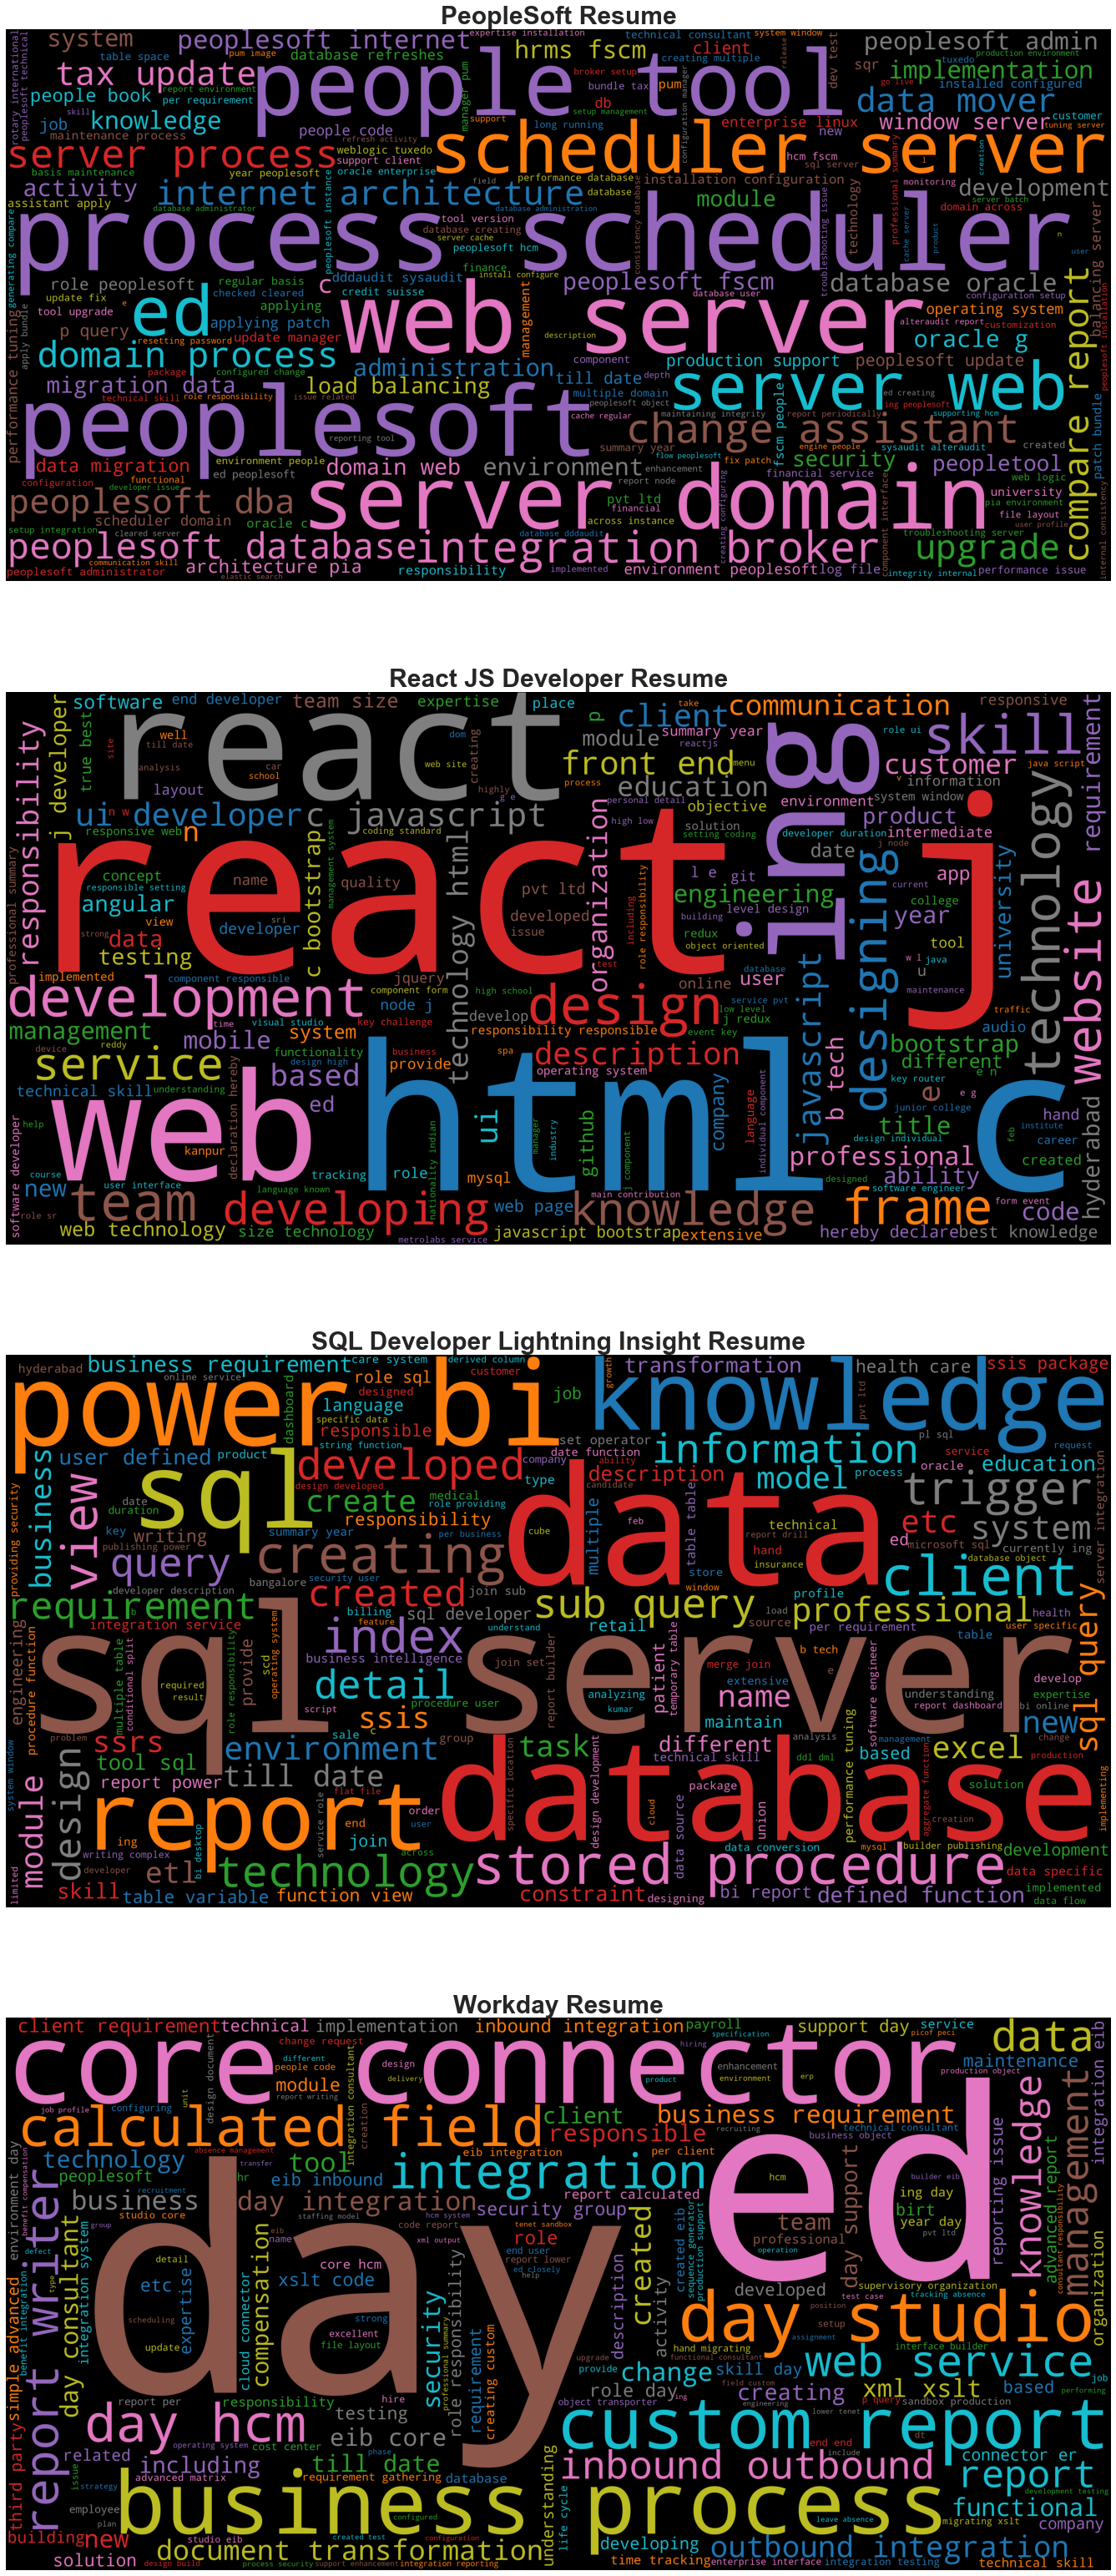

In [58]:
WORDCLOUD_COLOR_MAP = 'tab10_r'
plt.figure(figsize=(64, 56))

for i, category in enumerate(categories):
    wc = wordcloud(df_categories[i])

    plt.subplot(4, 1, i + 1).set_title(category,fontsize=30,fontweight= 'bold')
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

# Model Building

In [59]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import SVC

In [60]:
def predict(model):
    model = model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    trainac = model.score(xtrain, ytrain)
    testac = model.score(xtest, ytest)
    
    print(f"Train accuracy {trainac}\nTest accuracy {testac}")
    
    print(classification_report(ytest, ypred))

In [61]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [96]:
tf =  TfidfVectorizer(sublinear_tf=True,stop_words='english',ngram_range=(2,2))
x = tf.fit_transform(df['Resumes'])

x = pd.DataFrame(x.toarray(), columns=tf.get_feature_names_out())
x


ab software  abdul sharuk  ability achieve  ability build  \
0            0.0           0.0              0.0            0.0   
1            0.0           0.0              0.0            0.0   
2            0.0           0.0              0.0            0.0   
3            0.0           0.0              0.0            0.0   
4            0.0           0.0              0.0            0.0   
..           ...           ...              ...            ...   
100          0.0           0.0              0.0            0.0   
101          0.0           0.0              0.0            0.0   
102          0.0           0.0              0.0            0.0   
103          0.0           0.0              0.0            0.0   
104          0.0           0.0              0.0            0.0   

     ability building  ability communication  ability convey  ability create  \
0                 0.0                    0.0             0.0             0.0   
1                 0.0                    0.0             0.0             0.0   
2                 0.0                    0.0             0.0             0.0   
3                 0.0                    0.0             0.0             0.0   
4                 0.0                    0.0             0.0             0.0   
..                ...                    ...             ...             ...   
100               0.0                    0.0             0.0             0.0   
101               0.0                    0.0             0.0             0.0   
102               0.0                    0.0             0.0             0.0   
103               0.0                    0.0             0.0             0.0   
104               0.0                    0.0             0.0             0.0   

     ability creatively  ability deal  ...  zenefits day  zenefits hr  \
0                   0.0      0.000000  ...           0.0          0.0   
1                   0.0      0.000000  ...           0.0          0.0   
2                   0.0      0.000000  ...           0.0          0.0   
3                   0.0      0.000000  ...           0.0          0.0   
4                   0.0      0.000000  ...           0.0          0.0   
..                  ...           ...  ...           ...          ...   
100                 0.0      0.000000  ...           0.0          0.0   
101                 0.0      0.000000  ...           0.0          0.0   
102                 0.0      0.042374  ...           0.0          0.0   
103                 0.0      0.000000  ...           0.0          0.0   
104                 0.0      0.000000  ...           0.0          0.0   

     zenefits servicenow  zero line  zerozilla month  zerozilla software  \
0                    0.0        0.0         0.057928            0.057928   
1                    0.0        0.0         0.000000            0.000000   
2                    0.0        0.0         0.000000            0.000000   
3                    0.0        0.0         0.000000            0.000000   
4                    0.0        0.0         0.000000            0.000000   
..                   ...        ...              ...                 ...   
100                  0.0        0.0         0.000000            0.000000   
101                  0.0        0.0         0.000000            0.000000   
102                  0.0        0.0         0.000000            0.000000   
103                  0.0        0.0         0.000000            0.000000   
104                  0.0        0.0         0.000000            0.000000   

     zone production  zp high  ﬁnding ﬁts  ﬁts current  
0                0.0      0.0         0.0          0.0  
1                0.0      0.0         0.0          0.0  
2                0.0      0.0         0.0          0.0  
3                0.0      0.0         0.0          0.0  
4                0.0      0.0         0.0          0.0  
..               ...      ...         ...          ...  
100              0.0      0.0         0.0          0.0  
101  

In [63]:
df['Category'].unique()

array(['React JS Developer Resume', 'PeopleSoft Resume', 'Workday Resume',
       'SQL Developer Lightning Insight Resume'], dtype=object)

In [64]:
df.to_csv("clean_resume.csv")

In [65]:
label= LabelEncoder()

df['labels'] = label.fit_transform(df['Category'])

In [66]:
df['labels'].unique()

array([1, 0, 3, 2])

In [67]:
df

Resumes  \
0    name ravali p curriculum vitae specialization ...   
1    susovan bag seeking challenging position field...   
2    kanumuru deepak reddy career objective secure ...   
3    haripriya battina ui developer reactjs javascr...   
4    kamalakar reddy linked professional summary ye...   
..                                                 ...   
100  raju pavana kumari professional summary year p...   
101  resume ramalakshmi k career objective professi...   
102  name ramesh career objective contribute organi...   
103  tatikonda kiran kumar career objective rewardi...   
104  sql msbi developer sql msbi developer b vinod ...   

                                   Category  Length  labels  
0                 React JS Developer Resume     553       1  
1                 React JS Developer Resume     159       1  
2                 React JS Developer Resume     387       1  
3                 React JS Developer Resume     255       1  
4                 React JS Developer Resume     255       1  
..                                      ...     ...     ...  
100  SQL Developer Lightning Insight Resume     380       2  
101  SQL Developer Lightning Insight Resume     415       2  
102  SQL Developer Lightning Insight Resume     700       2  
103  SQL Developer Lightning Insight Resume     369       2  
104  SQL Developer Lightning Insight Resume     423       2  

[105 rows x 4 columns]

In [68]:
y = df['labels']

In [69]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [70]:
predict(LogisticRegression())

Train accuracy 1.0
Test accuracy 0.7619047619047619
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.17      1.00      0.29         1
           2       1.00      0.20      0.33         5
           3       1.00      1.00      1.00         9

    accuracy                           0.76        21
   macro avg       0.79      0.76      0.63        21
weighted avg       0.96      0.76      0.78        21



In [71]:
predict(DecisionTreeClassifier())

Train accuracy 1.0
Test accuracy 0.8095238095238095
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.33      1.00      0.50         1
           2       1.00      1.00      1.00         5
           3       1.00      0.67      0.80         9

    accuracy                           0.81        21
   macro avg       0.76      0.88      0.77        21
weighted avg       0.89      0.81      0.82        21



In [72]:
predict(RandomForestClassifier())

Train accuracy 1.0
Test accuracy 0.8571428571428571
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.25      1.00      0.40         1
           2       1.00      0.60      0.75         5
           3       1.00      1.00      1.00         9

    accuracy                           0.86        21
   macro avg       0.81      0.86      0.76        21
weighted avg       0.96      0.86      0.89        21



In [73]:
predict(AdaBoostClassifier())

Train accuracy 0.7142857142857143
Test accuracy 0.5238095238095238
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.11      1.00      0.20         1
           2       1.00      1.00      1.00         5
           3       1.00      0.56      0.71         9

    accuracy                           0.52        21
   macro avg       0.53      0.64      0.48        21
weighted avg       0.67      0.52      0.55        21



In [74]:
predict(GradientBoostingClassifier())

Train accuracy 1.0
Test accuracy 0.8571428571428571
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         5
           3       1.00      0.78      0.88         9

    accuracy                           0.86        21
   macro avg       0.80      0.90      0.83        21
weighted avg       0.89      0.86      0.86        21



In [75]:
predict(GaussianNB())

Train accuracy 1.0
Test accuracy 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         9

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [76]:
predict(SVC())

Train accuracy 1.0
Test accuracy 0.7619047619047619
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.17      1.00      0.29         1
           2       1.00      0.20      0.33         5
           3       1.00      1.00      1.00         9

    accuracy                           0.76        21
   macro avg       0.79      0.76      0.63        21
weighted avg       0.96      0.76      0.78        21



In [77]:
predict(KNeighborsClassifier())

Train accuracy 0.9880952380952381
Test accuracy 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         9

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



# Unigram Model

In [78]:
tf1 =  TfidfVectorizer(ngram_range=(1,1))
x = tf1.fit_transform(df['Resumes'])

x = pd.DataFrame(x.toarray(), columns=tf1.get_feature_names_out())
x


ab  abdul   ability  able  abreast  absence  absent  abstract  \
0    0.0    0.0  0.000000   0.0      0.0      0.0     0.0  0.000000   
1    0.0    0.0  0.000000   0.0      0.0      0.0     0.0  0.000000   
2    0.0    0.0  0.000000   0.0      0.0      0.0     0.0  0.000000   
3    0.0    0.0  0.000000   0.0      0.0      0.0     0.0  0.000000   
4    0.0    0.0  0.031883   0.0      0.0      0.0     0.0  0.000000   
..   ...    ...       ...   ...      ...      ...     ...       ...   
100  0.0    0.0  0.000000   0.0      0.0      0.0     0.0  0.000000   
101  0.0    0.0  0.021503   0.0      0.0      0.0     0.0  0.000000   
102  0.0    0.0  0.028000   0.0      0.0      0.0     0.0  0.073161   
103  0.0    0.0  0.025790   0.0      0.0      0.0     0.0  0.000000   
104  0.0    0.0  0.000000   0.0      0.0      0.0     0.0  0.000000   

     abstraction   ac  ...  young   yr  zealand  zenefits  zero  zerozilla  \
0       0.052549  0.0  ...    0.0  0.0      0.0       0.0   0.0   0.105098   
1       0.000000  0.0  ...    0.0  0.0      0.0       0.0   0.0   0.000000   
2       0.000000  0.0  ...    0.0  0.0      0.0       0.0   0.0   0.000000   
3       0.000000  0.0  ...    0.0  0.0      0.0       0.0   0.0   0.000000   
4       0.000000  0.0  ...    0.0  0.0      0.0       0.0   0.0   0.000000   
..           ...  ...  ...    ...  ...      ...       ...   ...        ...   
100     0.000000  0.0  ...    0.0  0.0      0.0       0.0   0.0   0.000000   
101     0.000000  0.0  ...    0.0  0.0      0.0       0.0   0.0   0.000000   
102     0.000000  0.0  ...    0.0  0.0      0.0       0.0   0.0   0.000000   
103     0.000000  0.0  ...    0.0  0.0      0.0       0.0   0.0   0.000000   
104     0.000000  0.0  ...    0.0  0.0      0.0       0.0   0.0   0.000000   

     zone   zp  ﬁnding  ﬁts  
0     0.0  0.0     0.0  0.0  
1     0.0  0.0     0.0  0.0  
2     0.0  0.0     0.0  0.0  
3     0.0  0.0     0.0  0.0  
4     0.0  0.0     0.0  0.0  
..    ...  ...     ...  ...  
100   0.0  0.0     0.0  0.0  
101   0.0  0.0     0.0  0.0  
102   0.0  0.0     0.0  0.0  
103   0.0  0.0     0.0  0.0  
104   0.0  0.0     0.0  0.0  

[105 rows x 4046 columns]

In [79]:
y = df['labels']

In [80]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [81]:
predict(LogisticRegression())

Train accuracy 1.0
Test accuracy 0.9047619047619048
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.33      1.00      0.50         1
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9

    accuracy                           0.90        21
   macro avg       0.83      0.91      0.82        21
weighted avg       0.97      0.90      0.92        21



In [82]:
predict(AdaBoostClassifier())

Train accuracy 1.0
Test accuracy 0.9523809523809523
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         9

    accuracy                           0.95        21
   macro avg       0.88      0.96      0.89        21
weighted avg       0.98      0.95      0.96        21



In [83]:
predict(GradientBoostingClassifier())

Train accuracy 1.0
Test accuracy 0.8095238095238095
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.33      1.00      0.50         1
           2       1.00      0.80      0.89         5
           3       1.00      0.78      0.88         9

    accuracy                           0.81        21
   macro avg       0.76      0.85      0.76        21
weighted avg       0.89      0.81      0.83        21



In [84]:
predict(GaussianNB())

Train accuracy 1.0
Test accuracy 0.9523809523809523
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.50      1.00      0.67         1
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9

    accuracy                           0.95        21
   macro avg       0.88      0.95      0.89        21
weighted avg       0.98      0.95      0.96        21



In [85]:
predict(DecisionTreeClassifier())

Train accuracy 1.0
Test accuracy 0.8571428571428571
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         5
           3       1.00      0.78      0.88         9

    accuracy                           0.86        21
   macro avg       0.80      0.90      0.83        21
weighted avg       0.89      0.86      0.86        21



In [86]:
predict(RandomForestClassifier())

Train accuracy 1.0
Test accuracy 0.9523809523809523
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.50      1.00      0.67         1
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9

    accuracy                           0.95        21
   macro avg       0.88      0.95      0.89        21
weighted avg       0.98      0.95      0.96        21



# Pipeline

In [87]:
from sklearn.pipeline import Pipeline

In [88]:
data= pd.read_csv(r'clean_resume.csv', usecols=['Resumes','Category'])

In [89]:
data

Resumes  \
0    name ravali p curriculum vitae specialization ...   
1    susovan bag seeking challenging position field...   
2    kanumuru deepak reddy career objective secure ...   
3    haripriya battina ui developer reactjs javascr...   
4    kamalakar reddy linked professional summary ye...   
..                                                 ...   
100  raju pavana kumari professional summary year p...   
101  resume ramalakshmi k career objective professi...   
102  name ramesh career objective contribute organi...   
103  tatikonda kiran kumar career objective rewardi...   
104  sql msbi developer sql msbi developer b vinod ...   

                                   Category  
0                 React JS Developer Resume  
1                 React JS Developer Resume  
2                 React JS Developer Resume  
3                 React JS Developer Resume  
4                 React JS Developer Resume  
..                                      ...  
100  SQL Developer Lightning Insight Resume  
101  SQL Developer Lightning Insight Resume  
102  SQL Developer Lightning Insight Resume  
103  SQL Developer Lightning Insight Resume  
104  SQL Developer Lightning Insight Resume  

[105 rows x 2 columns]

In [90]:
xtrain,xtest,ytrain,ytest = train_test_split(data['Resumes'],data['Category'],test_size=0.2,random_state=1)

In [91]:
# Define pipeline
model = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(2,2))),
    ('model', GradientBoostingClassifier(n_estimators=200, random_state=1))
])

In [92]:
model.fit(xtrain, ytrain)       # Train model using pipeline
y_pred = model.predict(xtest)   # Evaluate model on testing set
print(classification_report(ytest, y_pred))

                                        precision    recall  f1-score   support

                     PeopleSoft Resume       0.71      0.83      0.77         6
             React JS Developer Resume       0.50      1.00      0.67         1
SQL Developer Lightning Insight Resume       1.00      1.00      1.00         5
                        Workday Resume       1.00      0.78      0.88         9

                              accuracy                           0.86        21
                             macro avg       0.80      0.90      0.83        21
                          weighted avg       0.89      0.86      0.86        21



# Model Saving

In [93]:
import pickle

In [94]:
pickle.dump(model, open('model.pkl','wb'))

In [97]:
pickle.dump(tf, open('VECTOR.pkl','wb'))